In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
dataset = pd.read_csv('CC.csv')
dataset.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Remove null values by the mean

In [15]:
# finding null values in the dataset
dataset.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [17]:
# Replacing all the null values with the mean value
dataset.fillna(dataset.mean(),inplace=True)

In [20]:
# After replacing null values the dataset
dataset.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Use the elbow method to find a good number of clusters with the KMeans algorithm 

In [86]:
# To To get the all the features that we are going to use to categorize applications
X = dataset.iloc[:,1:-1]

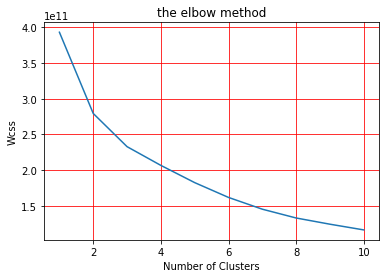

In [87]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.grid(b=True, which='major', color='RED', linestyle='-')
plt.show()

# Question 2

## Calculate the silhouette score for the above clustering

In [125]:
# building the model
from sklearn.cluster import KMeans
nclusters = 3

# To define a new object of KMeans with 3 clusters
km = KMeans(n_clusters=nclusters,init='k-means++')

# To train our model using the new number of clusters which is 3
km.fit(X)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X)

from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
print("silhouette_score:{}".format(score))

silhouette_score:0.46765520284747175


# Question 3

## Try feature scaling to see if it will improve the Silhouette score

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)


from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(X_scaled)
y_cluster_kmeans = km.predict(X_scaled)

from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print('Silhouette score for',3,'clusters after scaled',score)

Silhouette score for 3 clusters after scaled 0.26728393528907846


# Question 4

## Apply PCA on the same dataset

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)


from sklearn.decomposition import PCA   # Make an instance of the Model
pca= PCA(3)
X_pca= pca.fit_transform(X_scaled)


from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(X_pca)
y_cluster_kmeans = km.predict(X_pca)

from sklearn import metrics
score = metrics.silhouette_score(X_pca, y_cluster_kmeans)
print('Silhouette score for',3,'clusters after scaled',score)

Silhouette score for 3 clusters after scaled 0.3817029577310549


# Bonus

## Apply kmeans algorithm on the PCA result and report your observation if the score improved or not

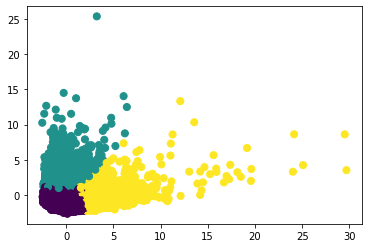

In [131]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_cluster_kmeans, s=50, cmap='viridis')
plt.show()
